Bayesian Multi-Armed Bandits

Let's imagine a player arriving at a casino interested in playing the slot machines. The slot machines in the casino will each pay out 1 or 0 dollars per play determined by an unknown probability of payout theta. This player is new to playing slots outside of knowing these basic rules. The player would like to maximize her earnings by finding the best slot machine in the casino. Where does she begin?

A naive strategy may be to play each slot machine in the casino an arbitrary amount of times and declare one a winner! Luckily for the player, she is knowledgable of bayesian methods and has formulated a better solution, the Bayesian Multi-Armed Bandit!

In [355]:
from scipy import stats
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math

In [197]:
# set random state
random_seed = np.random.RandomState(7)

In [198]:
num_arms = 3

In [414]:
# initialize arm payoff probabilities between 0 and 1
arm_payoff_probabilities = []

for i in range(0, num_arms):
    arm_payoff_probabilities.append(round(rand.random(),2))

In [415]:
print arm_payoff_probabilities

[0.35, 0.48, 0.58]


Remember that the player has never played slot machines before and cannot make any assumptions about the payoffs of the slot machines in the casino. Because of this she begins with an assumption that each slot machine has uniform probability of generating a payout between 0% and 100% of the time. We will call this assumption the prior belief for payoffs for each slot machine.

For the remainder of this tutorial, we will use a beta distribution https://en.wikipedia.org/wiki/Beta_distribution to represent the prior and posterior beliefs about each arms payoff function.

In [200]:
prior_alpha = 1
prior_beta = 1

In [319]:
# set arm priors and posteriors as uniform and identical beta distributions

arm_priors = []
arm_posteriors = []

for i in range(0, num_arms):
    arm_priors.append(stats.beta(prior_alpha, prior_beta))
    arm_posteriors.append(stats.beta(a=prior_alpha, b=prior_beta))


Before going any further let's cover Bayes Rule and basic bayesian inference.

Bayes rule can be written as follows
P(A|B) = P(B|A) * P(A) / P(B)

Bayesian inference aims to solve for P(A|B) as shown above. In short, bayesian inference is interested in what the probability of some event A happening given some data B. For the slot machine example being covered, A is the payoff probability for a given arm and B represents the observed payouts.

Let's further break down Bayes rule into four parts to better understand terminology.

The Posterior: P(A|B), what we want and will use to predict data in the future. In the slot machine example the posterior is a distribution of probabilities that a certain payoff percentage is the payoff percentage of the slot machine.

The Likelihood: P(B|A), this is the probability of observing some data B given a particular value of A. In our example, this is the probability of observing a certain combination of payouts given a particular payoff percentage. 

The Prior: P(A), this is our prior belief about the parameter A. P(A) is typically represented as a distribution in what we believe the probability of A taking on a certain value is. P(A) is called a "prior" belief because we determine the distribution to represent P(A) before having observed any data. In our slot machine example we assume the payoff percentage to be of equal probability across all possible payoff percentage values because we have no concept of how much the slot machines we are playing will payout.

The Marginal: P(B), for the purposes of this exercise we will throw out the marginal and construct our function like so: P(A|B) = P(B|A) * P(A)

The prior distributions are shown below

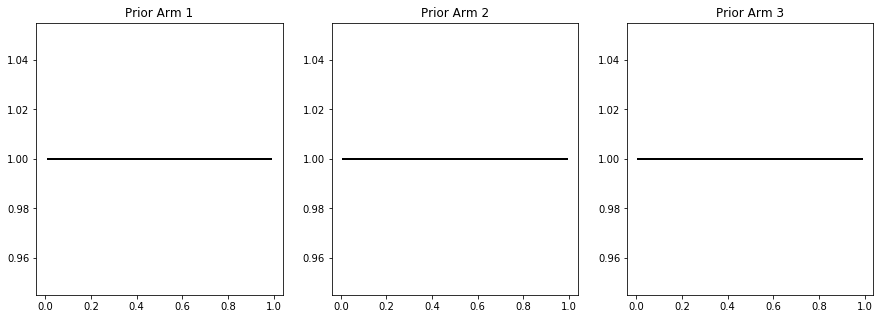

In [255]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
x = np.linspace(stats.beta.ppf(0.01, 1, 1), stats.beta.ppf(0.99, 1, 1), 100)

for i in range(0, num_arms):
    ax[i].set_title("Prior Arm " + str(i + 1))
    ax[i].plot(x, arm_priors[i].pdf(x), 'k-', lw=2, label='frozen pdf')
 

And the posterior distributions are shown below here as well. Notice that the first posterior distributions or the same as the prior distributions.

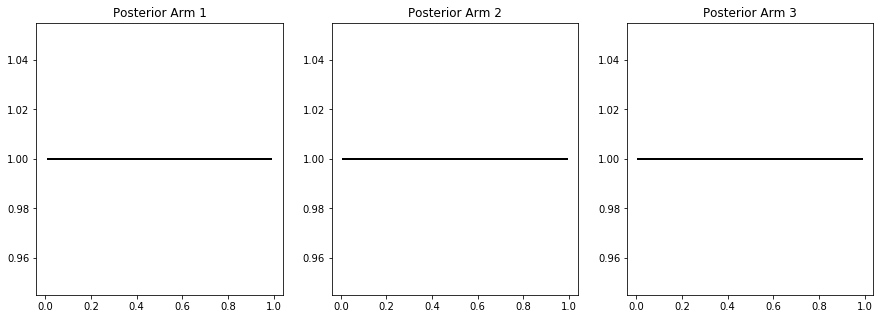

In [276]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
x = np.linspace(stats.beta.ppf(0.01, 1, 1), stats.beta.ppf(0.99, 1, 1), 100)

for i in range(0, num_arms):
    ax[i].set_title("Posterior Arm " + str(i + 1))
    ax[i].plot(x, arm_posteriors[i].pdf(x), 'k-', lw=2, label='beta pdf')

The player is now ready to begin playing the slots! Riches await! But how will she determine which machine to play?

Using her knowledge of Bayesian statistics, the player decides to employ a strategy called thompson sampling. The strategy works as follows

For number of time steps T:
1. Draw sample from each posterior distribution
2. Play arm that generates the sample with the highest sampled payoff percentage
3. Observe payout {0 or 1}
4. Update Posteriors

What we will see demonstrated below is that slot machines will be played in accordance to their probability of having the best payoff percentage. As slot machines are played more, the posterior beta distributions will grow thinner and taller.

In the plots below. We see that the first posteriors are uniform distributions and that over time the arm posteriors change in accordance to the payoffs observed. The blue vertical lines represent the sample payoff percentage drawn from the posteriors, the arm played is the posterior plot with the blue vertical line furthest to the right.

arm 1, alpha: 1 ; beta: 1
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.5


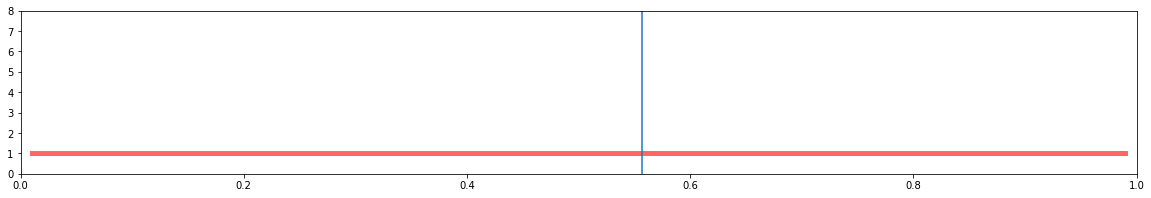

arm 2, alpha: 1 ; beta: 1
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.5


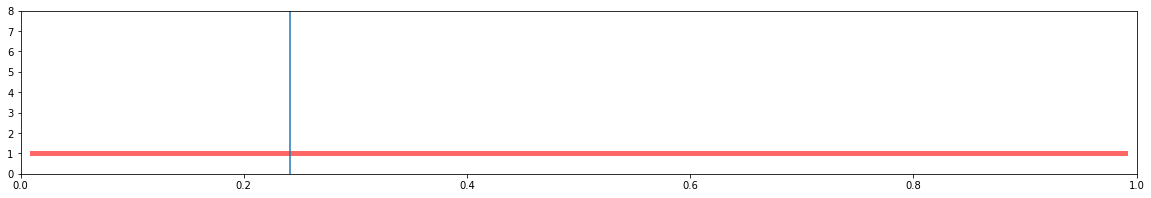

arm 3, alpha: 1 ; beta: 1
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5


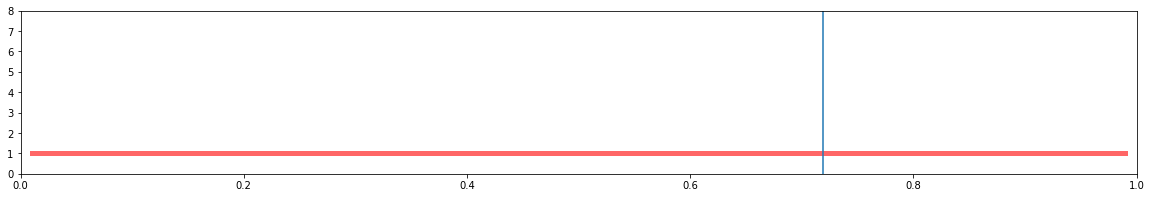

arm pulled 3
result: 1

arm pulled 1
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 1

arm pulled 2
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm 1, alpha: 1 ; beta: 2
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.3333333333333333


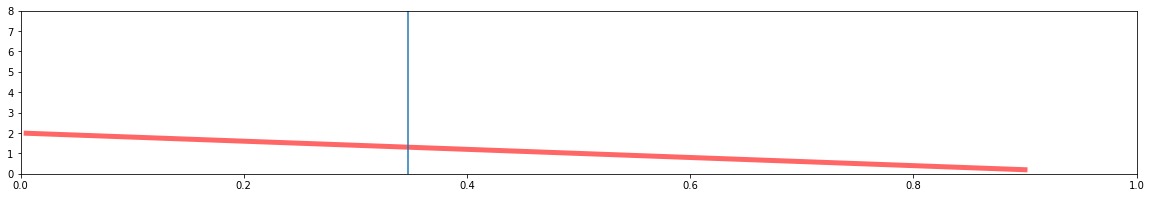

arm 2, alpha: 2 ; beta: 3
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4


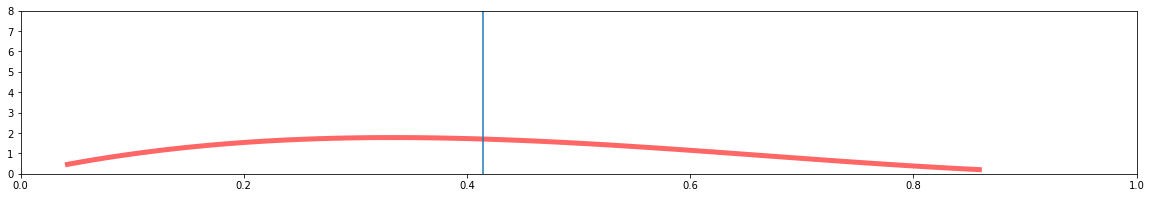

arm 3, alpha: 5 ; beta: 3
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.625


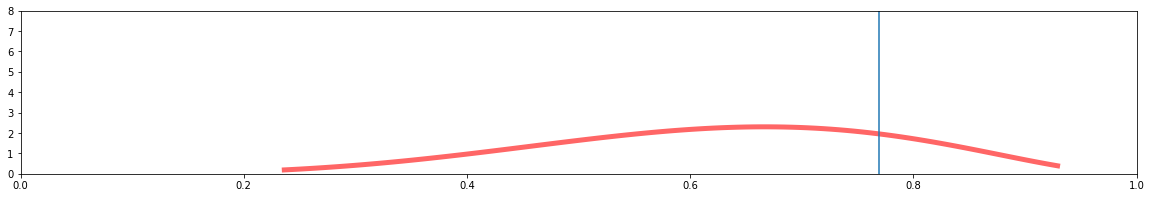

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 1

arm pulled 3
result: 0

arm pulled 2
result: 1

arm pulled 2
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 0

arm 1, alpha: 1 ; beta: 2
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.3333333333333333


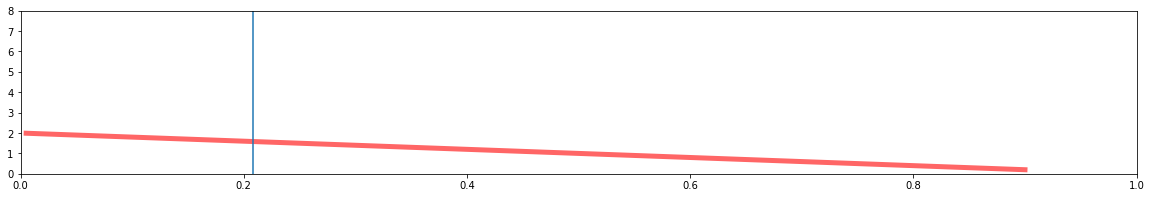

arm 2, alpha: 4 ; beta: 4
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.5


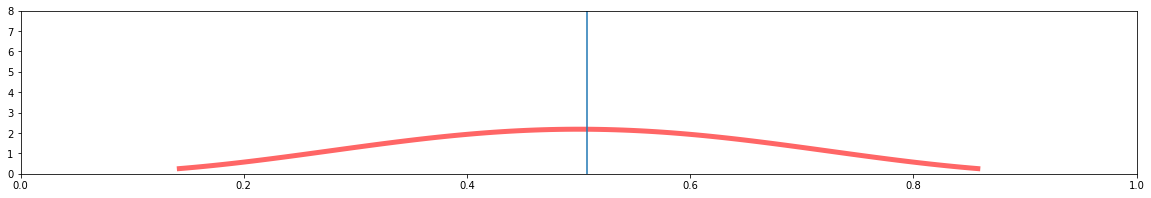

arm 3, alpha: 8 ; beta: 7
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5333333333333333


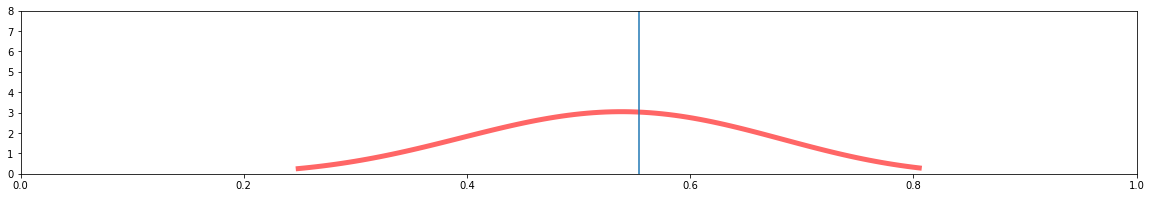

arm pulled 3
result: 1

arm pulled 2
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 2
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 0

arm 1, alpha: 1 ; beta: 2
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.3333333333333333


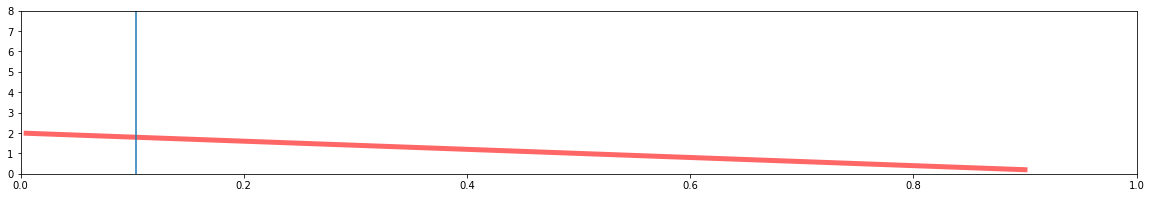

arm 2, alpha: 5 ; beta: 7
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4166666666666667


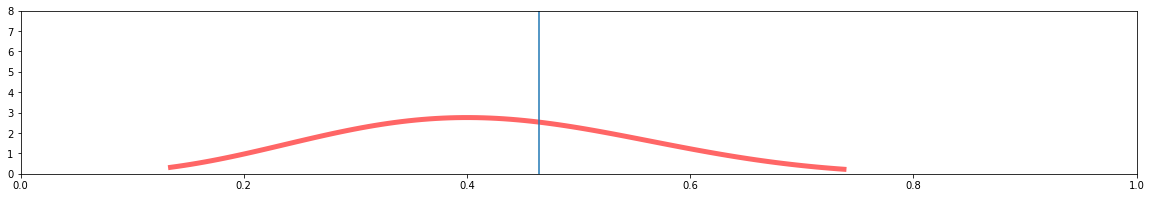

arm 3, alpha: 11 ; beta: 10
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5238095238095238


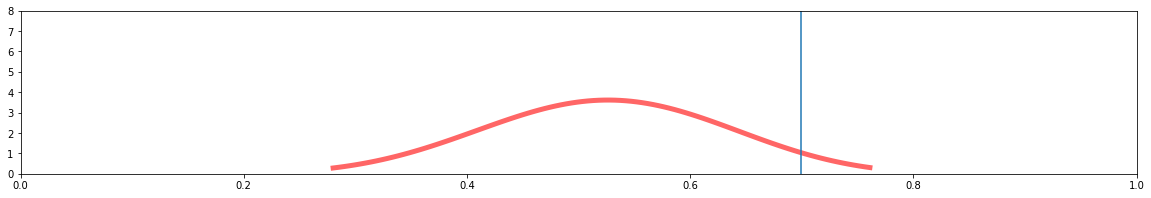

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 0

arm 1, alpha: 1 ; beta: 2
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.3333333333333333


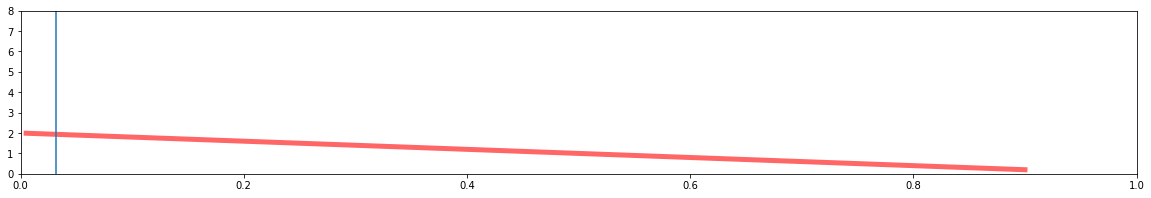

arm 2, alpha: 5 ; beta: 8
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.38461538461538464


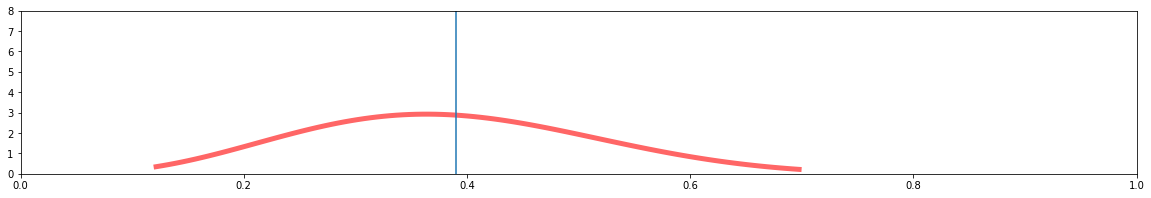

arm 3, alpha: 14 ; beta: 16
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.4666666666666667


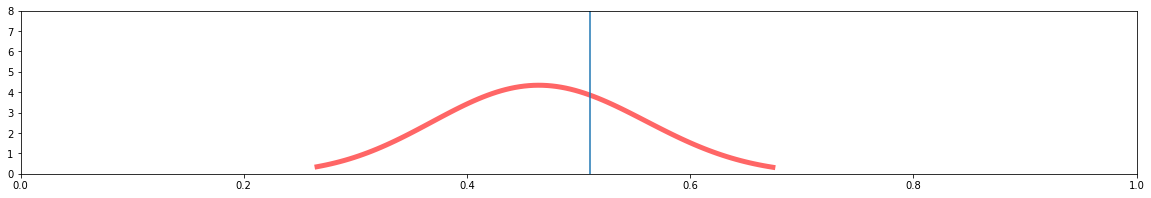

arm pulled 3
result: 1

arm pulled 2
result: 1

arm pulled 3
result: 1

arm pulled 1
result: 0

arm pulled 2
result: 1

arm pulled 2
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm 1, alpha: 1 ; beta: 3
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.25


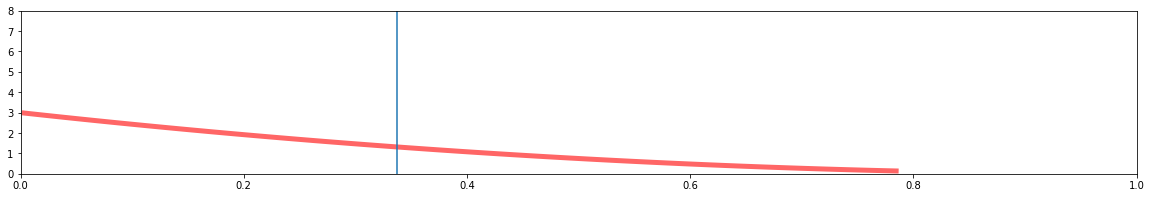

arm 2, alpha: 7 ; beta: 9
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4375


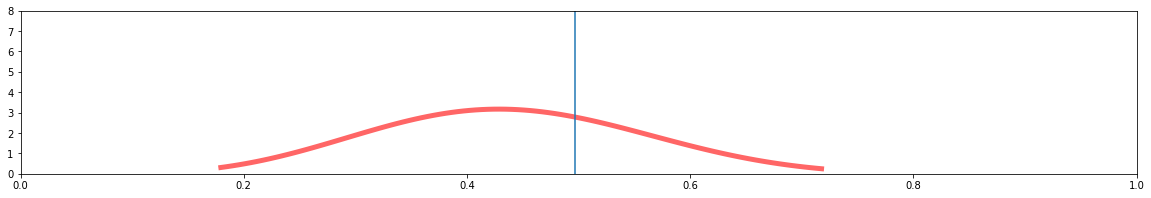

arm 3, alpha: 18 ; beta: 18
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5


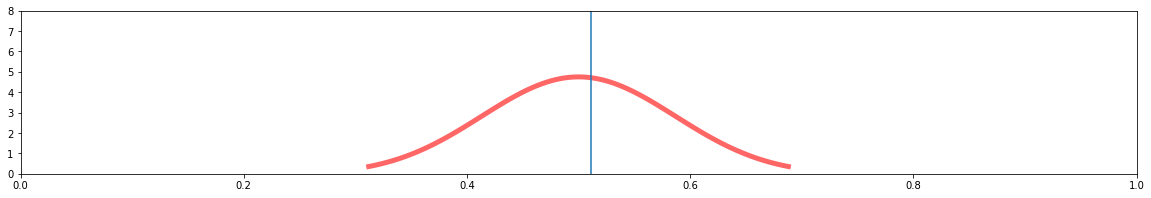

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 2
result: 1

arm pulled 3
result: 1

arm pulled 2
result: 1

arm pulled 3
result: 1

arm pulled 1
result: 1

arm pulled 1
result: 0

arm 1, alpha: 2 ; beta: 4
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.3333333333333333


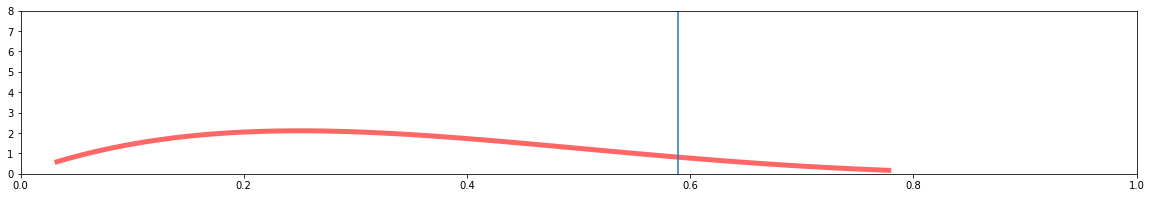

arm 2, alpha: 9 ; beta: 9
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.5


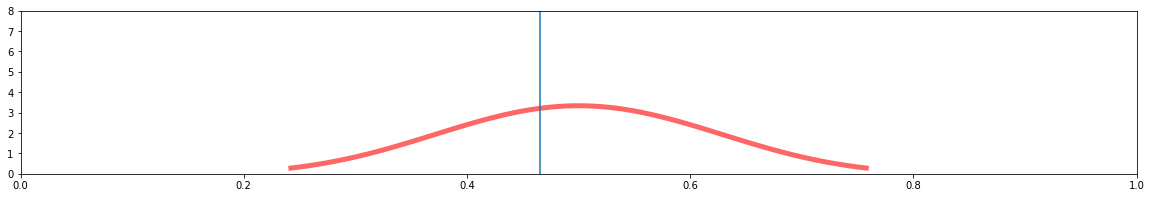

arm 3, alpha: 23 ; beta: 19
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5476190476190477


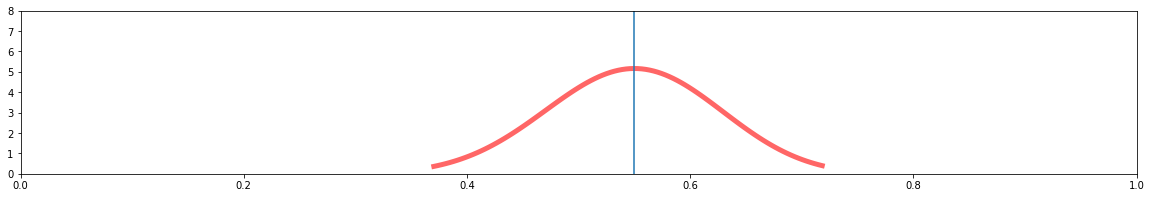

arm pulled 1
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 1

arm pulled 2
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 2
result: 0

arm pulled 2
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 1

arm 1, alpha: 2 ; beta: 5
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.2857142857142857


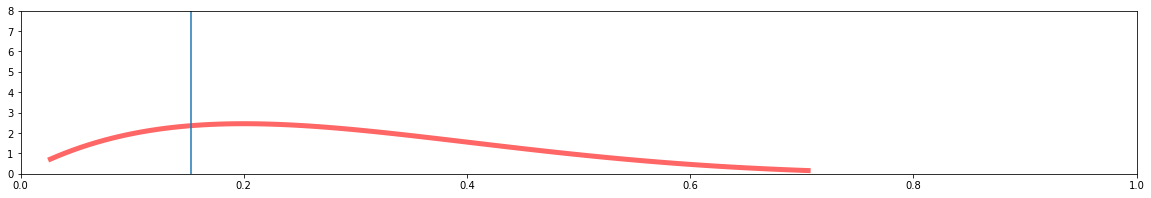

arm 2, alpha: 10 ; beta: 13
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.43478260869565216


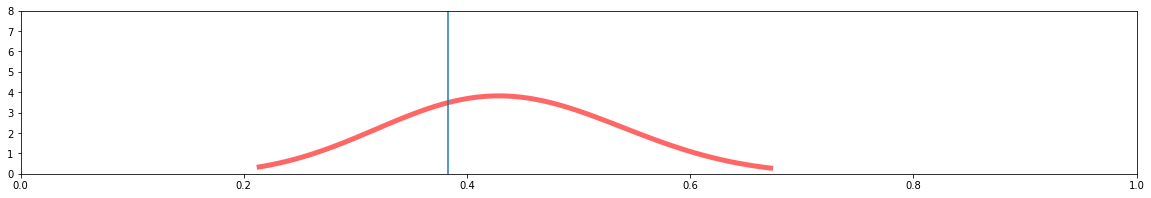

arm 3, alpha: 25 ; beta: 21
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5434782608695652


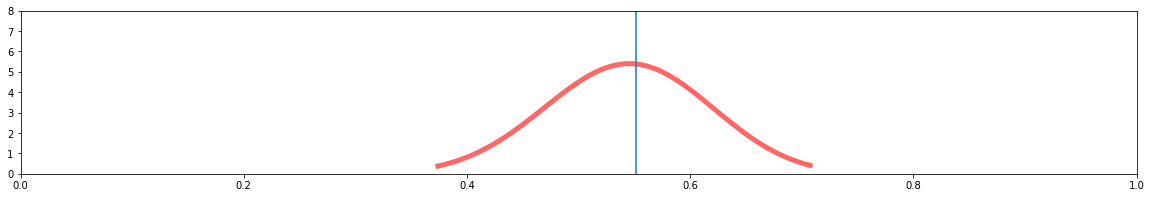

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 1

arm 1, alpha: 2 ; beta: 5
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.2857142857142857


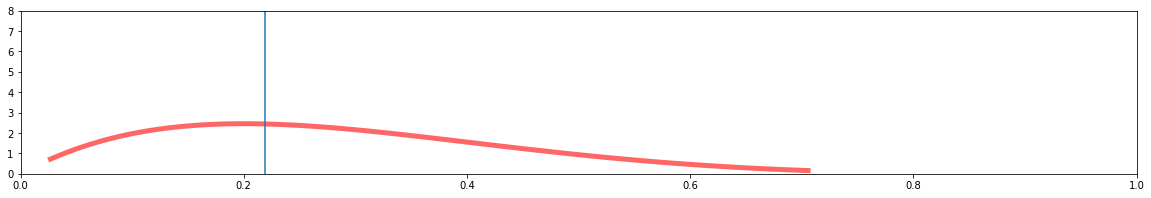

arm 2, alpha: 10 ; beta: 14
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4166666666666667


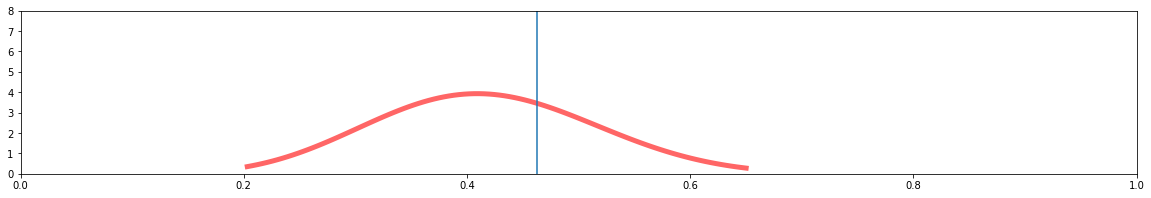

arm 3, alpha: 31 ; beta: 24
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5636363636363636


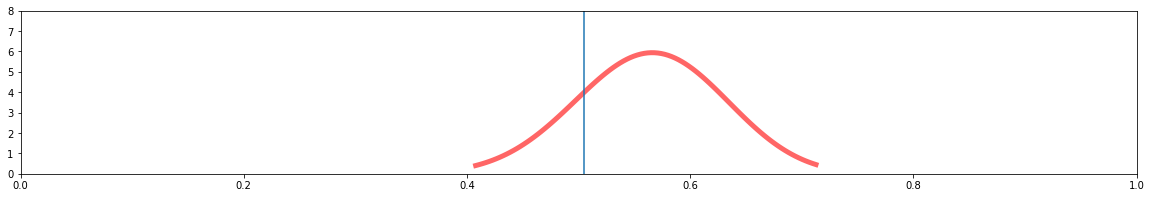

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 1

arm pulled 3
result: 1

arm 1, alpha: 2 ; beta: 5
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.2857142857142857


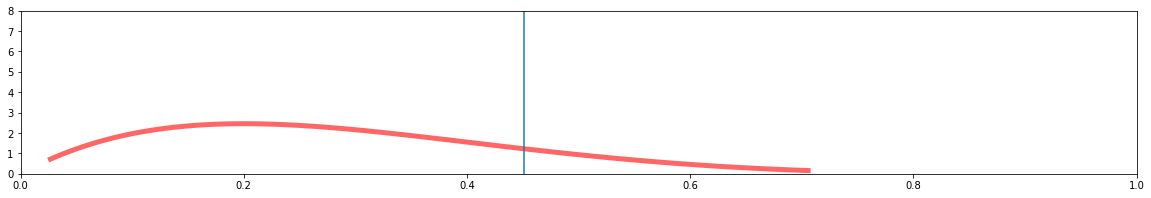

arm 2, alpha: 10 ; beta: 15
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4


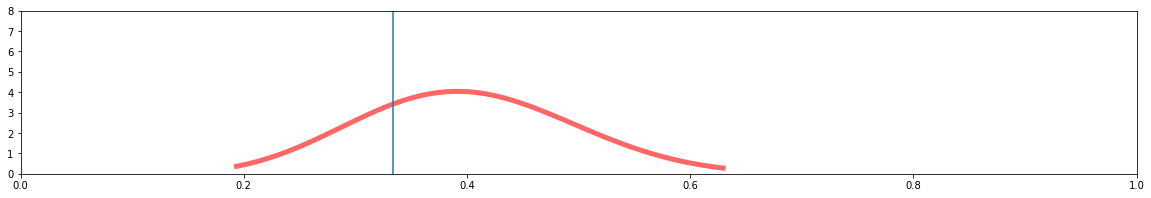

arm 3, alpha: 35 ; beta: 29
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.546875


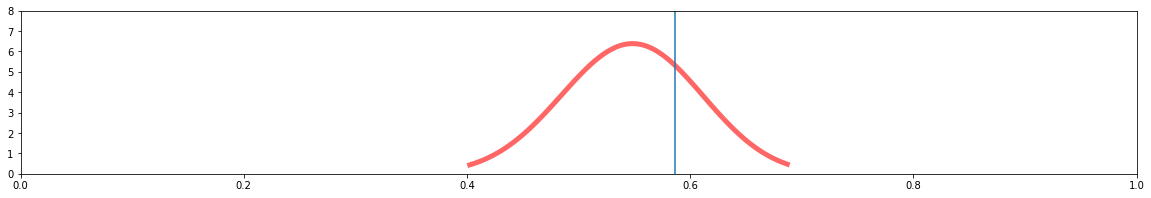

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 1

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 3
result: 0

arm pulled 2
result: 0

arm pulled 2
result: 1

arm 1, alpha: 2 ; beta: 5
arm 1, actual mean payoff: 0.35
arm 1, posterior mean: 0.2857142857142857


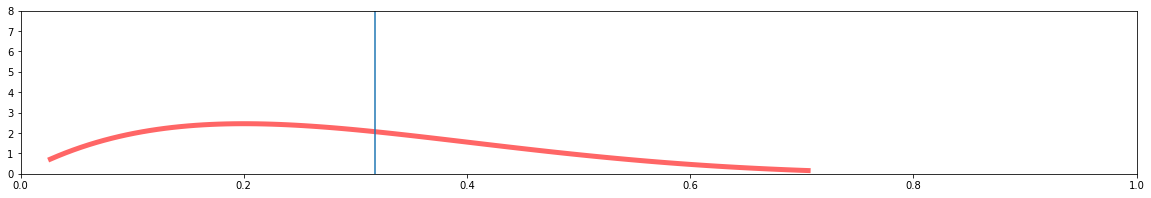

arm 2, alpha: 11 ; beta: 16
arm 2, actual mean payoff: 0.48
arm 2, posterior mean: 0.4074074074074074


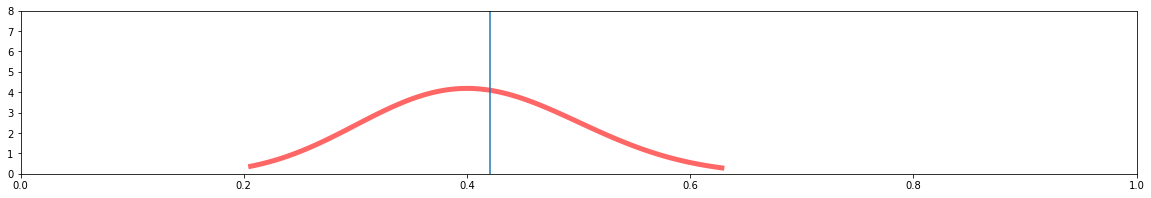

arm 3, alpha: 39 ; beta: 32
arm 3, actual mean payoff: 0.58
arm 3, posterior mean: 0.5492957746478874


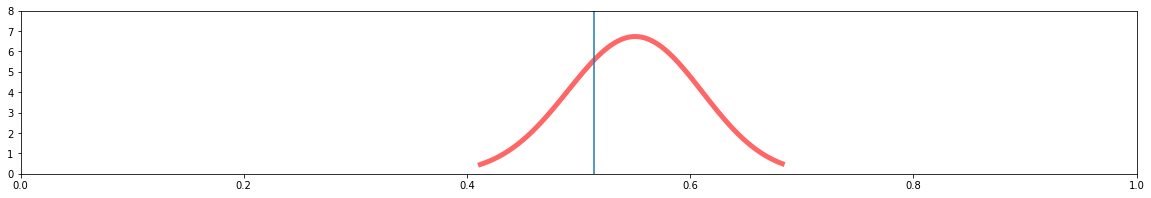

arm pulled 3
result: 1

total regret: 8.0


In [416]:
num_samples = 100

# starting with no prior data
arm_data = [[],[],[]]

arm_priors = []
arm_posteriors = []

# without data, arm posteriors are same as priors
for i in range(0, num_arms):
    arm_priors.append(stats.beta(prior_alpha, prior_beta))
    arm_posteriors.append(stats.beta(a=prior_alpha, b=prior_beta))

# initialize regret
regret = 0

# determine how frequently to display plots of posteriors
plot_frequency = 10

for i in range(0, num_samples):
    posterior_samples = []
    
    for j in range(0, num_arms):
        # get arms posterior parameters
        posterior_alpha = arm_posteriors[j].kwds['a']
        posterior_beta = arm_posteriors[j].kwds['b']
        
        # sample point from posterior
        posterior_space = np.linspace(stats.beta.ppf(0.01, posterior_alpha, posterior_beta), stats.beta.ppf(0.99, posterior_alpha, posterior_beta), 100)
        posterior_sample = stats.beta.rvs(a=posterior_alpha, b=posterior_beta, size=1)        
        posterior_samples.append((j, posterior_sample[0]))
        
        # plot posteriors every so often
        if(i % plot_frequency == 0 or i == num_samples - 1):
            print "arm " + str(j + 1) + ", alpha: " + str(posterior_alpha) + " ; beta: " + str(posterior_beta)
            print "arm " + str(j + 1) + ", actual mean payoff: " + str(arm_payoff_probabilities[j])
            print "arm " + str(j + 1) + ", posterior mean: " + str(stats.beta.mean(a=posterior_alpha, b=posterior_beta))
            
            beta_lin_space = np.linspace(stats.beta.ppf(0.01, posterior_alpha, posterior_beta),stats.beta.ppf(0.99, posterior_alpha, posterior_beta), 100)

            plt.figure(figsize=(20,3))
            plt.plot(beta_lin_space, stats.beta.pdf(beta_lin_space, posterior_alpha, posterior_beta),'r-', lw=5, alpha=0.6, label='beta pdf')

            plt.xlim(0, 1)
            plt.ylim(0, 8)
            plt.axvline(x=posterior_sample)
            plt.show()
        
    # pick arm to pull based on max of posterior samples
    arg_max_posterior_sample = sorted(posterior_samples,key=lambda x: x[1], reverse=True)[0]
    arm_to_pull = arg_max_posterior_sample[0]
    
    # calculate if arm pull resulted in success
    arm_result = successful_pull(arm_payoff_probabilities[arm_to_pull])
    
    print "arm pulled " + str(arm_to_pull + 1)
    
    # update observed data
    if(arm_result):
        print "result: " + str(1) + "\n"
        arm_data[arm_to_pull].append(1)
    else:
        print "result: " + str(0) + "\n"
        arm_data[arm_to_pull].append(0)
    
    # update regret
    regret = regret + max(arm_payoff_probabilities) - arm_result
    
    #update posteriors with new data
    posterior_parameters = update_posterior(arm_data[arm_to_pull], prior_alpha, prior_beta)    
    arm_posteriors[arm_to_pull] = stats.beta(a=posterior_parameters[0], b=posterior_parameters[1])

print "total regret: " + str(regret)

And voila! The final plots above represent the posterior payoff percentage distributions for each slot machine. Given enough time steps, you will notice that the arm with the best payoff percentage should have the thinnest and tallest posterior distribution, centered closely to its actual payoff percentage. This is because the machine with the highest payoff percentage should be sampled more frequently as, remember, our player will play the slot machines in accordance to the probability of the slot machine having the highest playoff percentage.

You will notice a "total regret" at the bottom as well. This is measured as the expected value of playing the best arm - the total payoff received over the experiment. i.e regret = E(optimal arm) - (rewards observed)

In [174]:
def successful_pull(success_probability):
    random_num = rand.random()
    return random_num <= success_probability

In [286]:
def update_posterior(data, prior_alpha, prior_beta):    
    posterior_predictive_alpha = prior_alpha
    posterior_predictive_beta = prior_beta + len(data)
    
    for data_point in data:
        posterior_predictive_alpha = posterior_predictive_alpha + data_point
        posterior_predictive_beta = posterior_predictive_beta - data_point
    
    return (posterior_predictive_alpha, posterior_predictive_beta)